In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
names_cross = ['Fold assignment','true class','Feature 1', 'Feature 2']
df_cross = pd.read_csv('./dataSetCrossValWithKeys.csv',header = None, names = names_cross)
df_cross.head()

,Fold assignment,true class,Feature 1,Feature 2
0,2,1,0.485120,-0.131560
1,1,1,0.449150,0.436860
2,2,0,-0.103350,0.403760
3,2,0,-0.356590,-0.006701
4,2,0,-0.078828,-0.013261


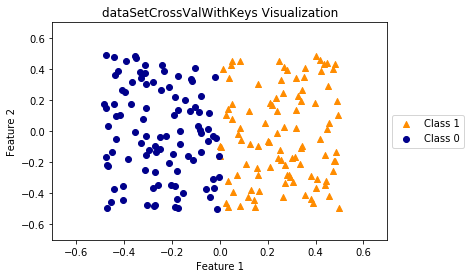

In [14]:
plt.figure()
ax = plt.subplot()
plt.scatter(df_cross[df_cross['true class']==1]['Feature 1'], df_cross[df_cross['true class']==1]['Feature 2'],
            label = 'Class 1',marker = '^' ,c = 'darkorange')
plt.scatter(df_cross[df_cross['true class']==0]['Feature 1'], df_cross[df_cross['true class']==0]['Feature 2'],
            label = 'Class 0',marker = "o", c = 'darkblue')
plt.title('dataSetCrossValWithKeys Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-0.7,0.7])
plt.ylim([-0.7,0.7])
box = ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
df_cross.shape

(200, 4)

In [16]:
X = df_cross.loc[:,'Feature 1':]
y = df_cross['true class']

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp

In [18]:
def a_roc(X,y):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X,y)
    y_pred = knn.predict_proba(X)
    fpr,tpr,threshold = roc_curve(y,y_pred[:,1])
    roc_auc = auc(fpr,tpr)
    plt.scatter(fpr, tpr, c='red', lw = 2,marker = '^',label = 'points')
    plt.plot(fpr, tpr, c='navy', lw = 2,label = 'KNN = 5'+ ' (AUC = %0.3f)' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('1(a).ROC Curve of KNN')
    plt.show()

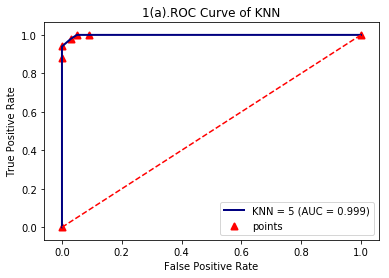

In [10]:
a_roc(X,y)

In [19]:
df_fold_1=df_cross[df_cross['Fold assignment']==1]
df_fold_2=df_cross[df_cross['Fold assignment']==2]
fold = list()
fold.append(df_fold_1)
fold.append(df_fold_2)

In [16]:
def plot_auc(fold):
    plt.figure()
    ax = plt.subplot()
    tprs = []
    aucs = []
    color = ['purple','yellow']
    mean_fpr = np.linspace(0,1,100)
    for i in range(0,2):
        X_train = fold[i].loc[:,'Feature 1':]
        y_train = fold[i]['true class']
        X_test = fold[1-i].loc[:,'Feature 1':]
        y_test = fold[1-i]['true class']
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
        tprs.append(interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr,tpr,color=color[i],lw=2,alpha=0.3,label='ROC fold %d (AUC = %.2F)' % (i, roc_auc))
    plt.plot([0,1],[0,1],'r--',lw=2,alpha=0.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    """
    plot incestuous training and testing

    """

    tprs_in = []
    aucs_in= []
    for i in range(0,2):
        X_train = fold[i].loc[:,'Feature 1':]
        y_train = fold[i]['true class']
        X_test = fold[1-i].loc[:,'Feature 1':]
        y_test = fold[1-i]['true class']
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_train)
        fpr,tpr,threshold = roc_curve(y_train,y_pred[:,1])
        tprs_in.append(interp(mean_fpr,fpr,tpr))
        tprs_in[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr,tpr,lw=2,alpha=0.3,label='incestuous ROC fold %d (AUC = %.2F)' % (i, roc_auc))
    mean_tpr_in = np.mean(tprs_in, axis=0)
    mean_auc_in = auc(mean_fpr, mean_tpr_in)
    std_auc_in = np.std(aucs_in)
    plt.plot(mean_fpr, mean_tpr_in, color='green',
             label=r'incestuous Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_in, std_auc_in),
             lw=2, alpha=.8)

    std_tpr_in = np.std(tprs_in, axis=0)
    tprs_upper_in= np.minimum(mean_tpr_in + std_tpr_in, 1)
    tprs_lower_in = np.maximum(mean_tpr_in - std_tpr_in, 0)
    plt.fill_between(mean_fpr, tprs_lower_in, tprs_upper_in, color='grey', alpha=.2)


    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('1(b).Receiver operating characteristic Curve')
    box = ax.get_position()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

D:\Program Files\ANACONA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Program Files\ANACONA\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Program Files\ANACONA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


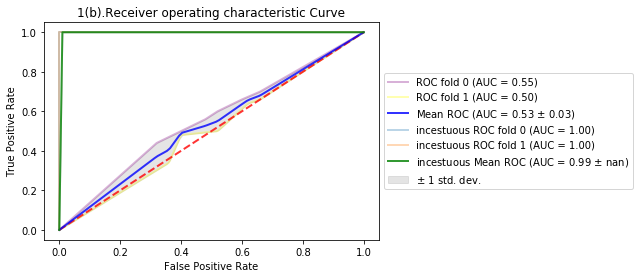

In [206]:
plot_auc(fold)

In [6]:
def n_KNN(fold):
    h = .02  # step size in the mesh
    for i in range(0,2):
        X_train = fold[i].loc[:,'Feature 1':]
        y_train = fold[i]['true class']
        X_test = fold[1-i].loc[:,'Feature 1':]
        y_test = fold[1-i]['true class']
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train,y_train)
        # we create an instance of Neighbours Classifier and fit the data.
        X1 = np.array(X_train)
        y1 = np.array(y_train)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X1[:, 0].min() - 0.1, X1[:, 0].max() + 0.1
        y_min, y_max = X1[:, 1].min() - 0.1, X1[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z1 = Z[:,1].reshape(xx.shape)
        plt.figure(figsize=(7,4))
        #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        plt.contour(xx,yy,Z1, [50/100],colors='red')
        bck=plt.contourf(xx,yy,Z1,399,cmap='cool',vmax =1,vmin=0)
        # Plot also the training points
        plt.scatter(X[y==0]['Feature 1'], X[y==0]['Feature 2'], label='Class 0: train', c='lime',edgecolor='k', s=30)
        plt.scatter(X[y==1]['Feature 1'], X[y==1]['Feature 2'], label='Class 1: train', c='yellow',edgecolor='k', s=30)
        plt.scatter(X_test[y_test==0]['Feature 1'], X_test[y_test==0]['Feature 2'], marker = 's',label='Class 0: test', c='red', s=25)
        plt.scatter(X_test[y_test==1]['Feature 1'], X_test[y_test==1]['Feature 2'], marker='D', label='Class 1 test', c='b',edgecolor='k', s=25)
        # Prettify the graph
        box = ax.get_position()
        plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
        plt.colorbar(bck)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title("1(c).Trained on Fold %i, tested on Fold %i (k = %i)"
                  % (i+1,2-i,5))

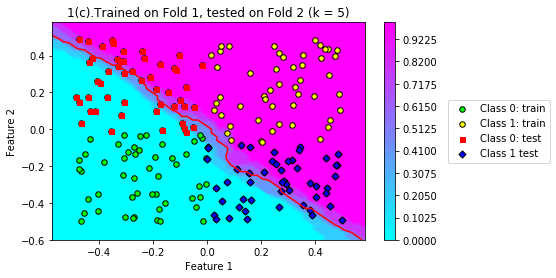

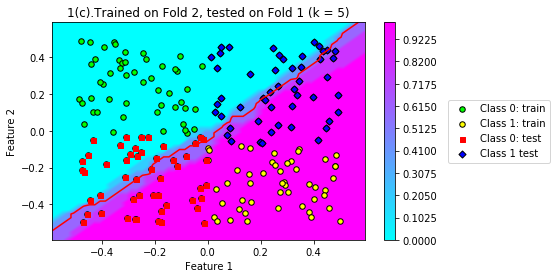

In [164]:
n_KNN(fold)

In [20]:
from sklearn.model_selection import StratifiedKFold
import pylab
import matplotlib._pylab_helpers

In [21]:
def contour(X,y,X_train,y_train,X_test,y_test,knn,i):
    h = .02
    X1 = np.array(X_train)
    y1 = np.array(y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X1[:, 0].min() - 0.1, X1[:, 0].max() + 0.1
    y_min, y_max = X1[:, 1].min() - 0.1, X1[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z1 = Z[:,1].reshape(xx.shape)
    fig = plt.figure(figsize=(7,4))
    #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.contour(xx,yy,Z1, [100/200],colors='red')
    bck=plt.contourf(xx,yy,Z1,399,cmap='cool',vmax =1,vmin=0)
    # Plot also the training points
    plt.scatter(X[y==0]['Feature 1'], X[y==0]['Feature 2'], label='Class 0: train', c='lime',edgecolor='k', s=30)
    plt.scatter(X[y==1]['Feature 1'], X[y==1]['Feature 2'], label='Class 1: train', c='yellow',edgecolor='k', s=30)
    plt.scatter(X_test[y_test==0]['Feature 1'], X_test[y_test==0]['Feature 2'], marker = 's',label='Class 0: test', c='red', s=25)
    plt.scatter(X_test[y_test==1]['Feature 1'], X_test[y_test==1]['Feature 2'], marker='D', label='Class 1 test', c='b',edgecolor='k', s=25)
    # Prettify the graph
    box = ax.get_position()
    plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
    plt.colorbar(bck)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("1(d).Trained on Fold %i, tested on Fold %i (k = %i)"
              % (i+1,2-i,5))            # Display plot and wait for user input.
    return fig

In [27]:
def e_plot(X,y,n_splits):
    skf = StratifiedKFold(n_splits = n_splits, shuffle=True, random_state=0)
    skf.get_n_splits(X,y)
    fig1, ax1 = plt.subplots()
    ax1 = plt.subplot()
    tprs = []
    aucs = []
    color = ['purple','yellow']
    mean_fpr = np.linspace(0,1,100)
    i = 0
    mylist = list()
    for train,test in skf.split(X,y):
        X_train,X_test = X.loc[train],X.loc[test]
        y_train,y_test = y.loc[train],y.loc[test]
        #print("TRAIN:", train, "TEST:", test)
        mylist.append(train)
        mylist.append(test)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
        tprs.append(interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr,tpr,lw=2,alpha=0.3,label='ROC fold %d (AUC = %.2F)' % (i, roc_auc))
        #contour(X,y,X_train,y_train,X_test,y_test,knn,i) 
        i +=1
        
         
    ax1.plot([0,1],[0,1],'r--',lw=2,alpha=0.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    ###################################################################
    
    tprs_in = []
    aucs_in = []
    j = 0
    for train,test in skf.split(X,y):
        X_train,X_test = X.loc[train],X.loc[train]
        y_train,y_test = y.loc[train],y.loc[train]
        #print("TRAIN:", train, "TEST:", test)
        mylist.append(train)
        mylist.append(test)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        fpr_in,tpr_in,threshold = roc_curve(y_test,y_pred[:,1])
        tprs_in.append(interp(mean_fpr,fpr_in,tpr_in))
        tprs[-1][0]=0.0
        roc_auc = auc(fpr_in, tpr_in)
        aucs_in.append(roc_auc)
        ax1.plot(fpr_in,tpr_in,lw=2,alpha=0.3,label='incestuous ROC fold %d (AUC = %.2F)' % (j, roc_auc))
        #contour(X,y,X_train,y_train,X_test,y_test,knn,j)  
        j +=1
    ax1.plot([0,1],[0,1],'r--',lw=2,alpha=0.8)
    mean_tpr_in = np.mean(tprs_in, axis=0)
    mean_auc_in = auc(mean_fpr, mean_tpr_in)
    std_auc_in = np.std(aucs_in)
    ax1.plot(mean_fpr, mean_tpr_in, color='green',
             label=r'incestuous Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_in, std_auc_in),
             lw=2, alpha=.8)

    std_tpr_in = np.std(tprs_in, axis=0)
    tprs_upper_in = np.minimum(mean_tpr_in + std_tpr_in, 1)
    tprs_lower_in = np.maximum(mean_tpr_in - std_tpr_in, 0)
    ax1.fill_between(mean_fpr, tprs_lower_in, tprs_upper_in, color='grey', alpha=.2)
    
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('1(d).Receiver operating characteristic Curve')
    box = ax1.get_position()
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    #print(mylist)

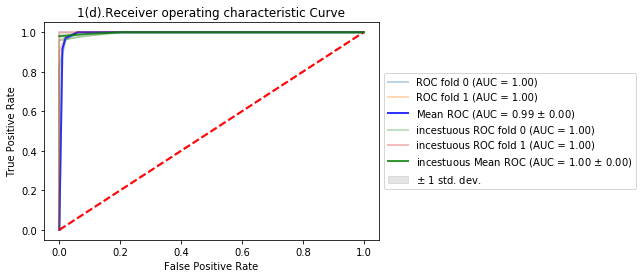

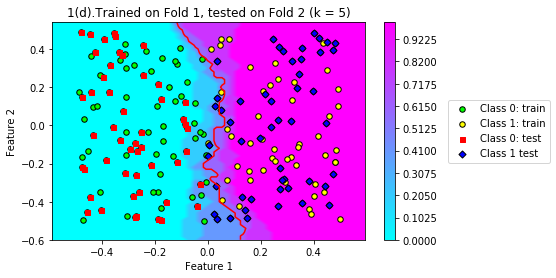

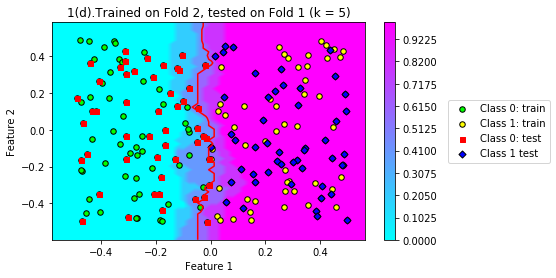

In [25]:
e_plot(X,y,2)

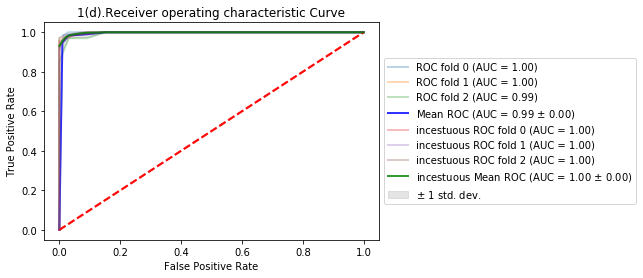

In [28]:
e_plot(X,y,3)# mute contour and print list

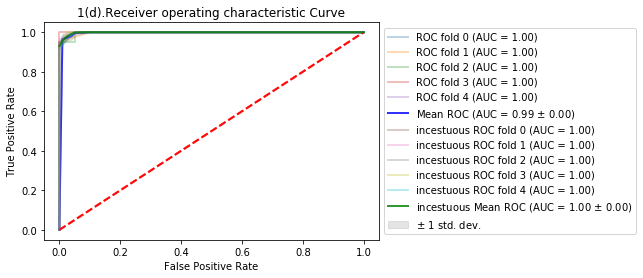

In [29]:
e_plot(X,y,5)# mute contour and print list

In [24]:
names_horse=['true class','Feature 1','Feature 2']
df_horse = pd.read_csv('./dataSetHorseshoes.csv',header=None, names=names_horse)
df_horse.head()

,true class,Feature 1,Feature 2
0,1,0.807,0.610
1,0,0.056,0.503
2,0,0.215,-1.086
3,1,0.189,0.890
4,0,0.688,-1.209


In [25]:
X_horse = df_horse.loc[:,'Feature 1':]
y_horse = df_horse['true class']
X_horse.head()

,Feature 1,Feature 2
0,0.807,0.610
1,0.056,0.503
2,0.215,-1.086
3,0.189,0.890
4,0.688,-1.209


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
def minPe(X,y):
    # testing on testing data
    fig1=plt.figure(figsize=(15,6))
    fig1, ax1 = plt.subplots()
    ax1 = plt.subplot()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state = 0,stratify=y)
    minPe = []
    x = []
    minPeT = [] # testing on training data
    xT = []
    num = len(y)
    for i in range(1,200):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        minPe.append(1 - max(mydict))
        x.append(num/i)
        yT_pred = knn.predict_proba(X_train)
        fprT, tprT, thresholdT = roc_curve(y_train, yT_pred[:, 1])
        mydictT = dict()
        for k in range(0,len(fprT)):
            Pcd = 0.5 * (1 - fprT[k]) + 0.5 * tprT[k]
            mydictT[Pcd] = k
        minPeT.append(1 - max(mydictT))
    y1 = min(minPe)
    index_min = np.argmin(minPe)
    x1 = x[index_min]
    N1 = num/x1
    y2 = min(minPeT)
    index_minT = np.argmin(minPeT)
    x2 = x[index_minT]
    N2 = num/x2   
    ax1.plot(x, minPe, c='darkorange', lw = 2,label = 'tested on testing data')
    ax1.plot(x, minPeT, c='green', lw = 2,label = 'tested on training data')
    ax1.scatter(x1, y1,c='b',label='tested on testing data: minPe %.2F' % (y1),edgecolor='k', s=50)
    ax1.scatter(x2, y2,c='R',label='tested on training data: minPe %.2F' % (y2),edgecolor='k', s=50)
    ax1.set_title('minPe as function of N/k')
   # plt.plot([0, 1], [0, 1],'r--')
    ax1.set_ylabel('minPe')
    ax1.set_xlabel('N/k')
#####################################################################################  
    skf = StratifiedKFold(n_splits = 10, shuffle=False, random_state=0)
    skf.get_n_splits(X,y)
    minPe_10 = []
    minPeT_10 = []
    color = ['purple','yellow']
    mean_fpr = np.linspace(0,1,100)
    for i in range(1,200):
        tprs = []
        tprsT = []
        for train,test in skf.split(X,y):
            X_train,X_test = X.loc[train],X.loc[test]
            y_train,y_test = y.loc[train],y.loc[test]
            #print("TRAIN:", train, "TEST:", test)
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train,y_train)
            y_pred = knn.predict_proba(X_test)
            fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
            tprs.append(interp(mean_fpr,fpr,tpr))
            tprs[-1][0]=0.0
        
            mydictT_10 = dict()
            yT_pred = knn.predict_proba(X_train)
            fprT,tprT,thresholdT = roc_curve(y_train,yT_pred[:,1])
            tprsT.append(interp(mean_fpr,fprT,tprT))
            tprsT[-1][0]=0.0
        mean_tpr = np.mean(tprs, axis=0)
        mydict_10 = dict()
        for j in range(0,len(mean_fpr)):
                Pcd = 0.5 * (1 - mean_fpr[j]) + 0.5 * mean_tpr[j]
                mydict_10[Pcd] = j
        minPe_10.append(1 - max(mydict_10))
        
        mean_tprT = np.mean(tprsT, axis=0)
        for j in range(0,len(mean_fpr)):
                Pcd = 0.5 * (1 - mean_fpr[j]) + 0.5 * mean_tprT[j]
                mydictT_10[Pcd] = j
        minPeT_10.append(1 - max(mydictT_10))
    y3 = min(minPe_10)
    index_min_10 = np.argmin(minPe_10)
    x3 = x[index_min_10]
    N3 = num/x3
    y4 = min(minPeT_10)
    index_minT_10 = np.argmin(minPeT_10)
    x4 = x[index_minT_10]
    N4 = num/x4   
    ax1.plot(x, minPe_10, c='lime', lw = 2,label = 'tested on testing data 10_Fold')
    ax1.plot(x, minPeT_10, c='magenta', lw = 2,label = 'tested on training data 10_Fold')
    ax1.scatter(x3, y3,c='b',marker='s',label='tested on testing data 10_Fold: minPe %.2F' % (y3),edgecolor='k', s=50)
    ax1.scatter(x4, y4,c='R',marker='X',label='tested on training data 10_Fold: minPe %.2F' % (y4),edgecolor='k', s=50)
    box = ax1.get_position()
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    print('tested on testing data: k = {}'.format(N1))
    print('tested on training data: k = {}'.format(N2))
    print('tested on testing data_10_Fold: k = {}'.format(N3))
    print('tested on training data_10_Fold: k = {}'.format(N4))

<Figure size 1080x432 with 0 Axes>

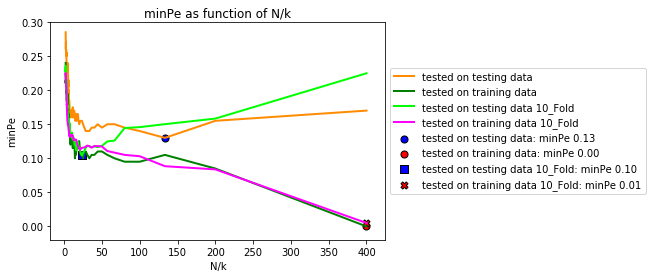

tested on testing data: k = 3.0
tested on training data: k = 1.0
tested on testing data_10_Fold: k = 17.0
tested on training data_10_Fold: k = 1.0


In [28]:
 minPe(X_horse,y_horse)